<a href="https://colab.research.google.com/github/tusharsingh9820/Powerlifting/blob/main/PowerLifting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Exploratory Data Analysis Case Study: Weightlifting Tournament**
![](https://d2cyblhgq88dk3.cloudfront.net/uploads/article/image/107/large_Blog-Barbell.jpg)

Exploratory Data Analysis (EDA) is the process of exploring, investigating and gathering insights from data using statistical measures and visualizations. The objective of EDA is to develop and understanding of data, by uncovering trends, relationships and patterns.

EDA is both a science and an art. On the one hand it requires the knowledge of statistics, visualization techniques and data analysis tools like Numpy, Pandas, Seaborn etc. On the other hand, it requires asking interesting questions to guide the investigation and interpreting numbers & figures to generate useful insights.

**About Data :**

Weightlifting Tournament is world wide competition.This data is combination of worldwide different of Weightlifting Tournament from various tournament throughout the the world.

Around 2.5 Lakhs competitors qualified the different competition and got there name in this final list.But in International Powerlifting Federation there are 7 Divisions(with respect to there age) with two gender(male & female).There are 3 core Press, Squat and DeadLift done in 4 format Raw, Wraps, Single-ply, Multi-ply, Straps.

The competitors got place in different divisions with particulars equipment getting there best out of 3 attempts in differnt core.Making there score in form of Wilks,it is used to measuring the strength of a powerlifter against other powerlifters despite the different weights of the lifters.

There are 386414 rows × 17 columns in data.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
o_data = pd.read_csv('/content/openpowerlifting.csv')
o_data

,MeetID,Name,Sex,Equipment,Age,Division,BodyweightKg,WeightClassKg,Squat4Kg,BestSquatKg,Bench4Kg,BestBenchKg,Deadlift4Kg,BestDeadliftKg,TotalKg,Place,Wilks
0,0,Angie Belk Terry,F,Wraps,47.0,Mst 45-49,59.60,60,NaN,47.63,NaN,20.41,NaN,70.31,138.35,1,155.05
1,0,Dawn Bogart,F,Single-ply,42.0,Mst 40-44,58.51,60,NaN,142.88,NaN,95.25,NaN,163.29,401.42,1,456.38
2,0,Dawn Bogart,F,Single-ply,42.0,Open Senior,58.51,60,NaN,142.88,NaN,95.25,NaN,163.29,401.42,1,456.38
3,0,Dawn Bogart,F,Raw,42.0,Open Senior,58.51,60,NaN,NaN,NaN,95.25,NaN,NaN,95.25,1,108.29
4,0,Destiny Dula,F,Raw,18.0,Teen 18-19,63.68,67.5,NaN,NaN,NaN,31.75,NaN,90.72,122.47,1,130.47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
386409,8481,William Barabas,M,Multi-ply,NaN,Elite,113.58,125,NaN,NaN,NaN,NaN,NaN,347.50,347.50,2,202.60
386410,8481,Justin Zottl,M,Multi-ply,NaN,Elite,119.02,125,NaN,NaN,NaN,NaN,NaN,322.50,322.50,3,185.77
386411,8481,Jake Anderson,M,Multi-ply,NaN,Elite,120.29,125,NaN,NaN,NaN,NaN,NaN,367.50,367.50,1,211.17
386412,8481,Jeff Bumanglag,M,Multi-ply,NaN,Elite,126.73,140,NaN,NaN,NaN,NaN,NaN,320.00,320.00,3,181.85


##**Data Cleaning**

In [ ]:
o_data=o_data.sort_values(by=['Age','BodyweightKg','Wilks'])

In [ ]:
o_data.drop(['Bench4Kg','Deadlift4Kg','Squat4Kg','Division','WeightClassKg'],axis=1,inplace=True)

>#### **Remove Duplicate Data**

In [ ]:
o_data.drop_duplicates(subset=['Name','Sex','Equipment','Age','MeetID'],inplace=True)

In [ ]:
o_data=o_data.dropna(subset=['Wilks'])

In [ ]:
o_data.dropna(subset=['Age', 'Equipment'], inplace=True)

>#### **Setting Age limit according to IPF rules**

In [ ]:
o_data.drop(o_data[(o_data.Age <= 15)].index, inplace=True)
o_data.drop(o_data[(o_data.Age >= 75)].index, inplace=True)

>#### **Setting Bodyweight limit according to IPF rules**

In [ ]:
o_data.drop(o_data[(o_data.BodyweightKg > 180) & (o_data.Sex=='M')].index,inplace=True)
o_data.drop(o_data[(o_data.BodyweightKg > 130) & (o_data.Sex=='F')].index,inplace=True)
o_data.drop(o_data[(o_data.BodyweightKg < 40) & (o_data.Sex=='F')].index, inplace=True)
o_data.drop(o_data[(o_data.BodyweightKg < 45) & (o_data.Sex=='M')].index, inplace=True)

In [ ]:
o_data.drop(o_data[((o_data.BestSquatKg<50)|(o_data.BestBenchKg<40)|(o_data.BestDeadliftKg<60)) & (o_data.Sex=='M')].index, inplace=True)
o_data.drop(o_data[((o_data.BestSquatKg<40)|(o_data.BestBenchKg<30)|(o_data.BestDeadliftKg<50)) & (o_data.Sex=='F')].index, inplace=True)

>#### **Removing Guest and absent lifters**

In [ ]:
o_data.dropna(subset=["Place"], inplace=True)

In [ ]:
o_data.drop(o_data[(o_data.Place=='G')].index,inplace=True)

>#### **Setting new MeetID(Primary Key)**

In [ ]:
o_data.drop(['MeetID'],axis=1,inplace=True)

In [ ]:
o_data['MeetID'] = o_data.index

In [ ]:
o_data=o_data[['MeetID','Name', 'Sex', 'Equipment', 'Age', 'BodyweightKg', 'BestSquatKg',
       'BestBenchKg', 'BestDeadliftKg', 'TotalKg', 'Wilks','Place']]

> ### **Division allocation**

>>#### **Women data**

In [ ]:
W_data=o_data[o_data.Sex=='F']
W_Sub_junior=W_data[W_data.Age<=18]
W_Sub_junior['Division']='W_Sub_junior'
W_Junior=W_data[(W_data.Age>=19)&(W_data.Age<=23)]
W_Junior['Division']='W_Junior'
W_Open=W_data[(W_data.Age>=24)&(W_data.Age<=39)]
W_Open['Division']='W_Open'

<ipython-input-319-a6e2131ceddd>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  W_Sub_junior['Division']='W_Sub_junior'
<ipython-input-319-a6e2131ceddd>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  W_Junior['Division']='W_Junior'
<ipython-input-319-a6e2131ceddd>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gui

In [ ]:
W_Masters_1=W_data[(W_data.Age>=40)&(W_data.Age<=49)]
W_Masters_1['Division']='W_Masters_1'
W_Master_2=W_data[(W_data.Age>=50)&(W_data.Age<=59)]
W_Master_2['Division']='W_Master_2'
W_Masters_3=W_data[(W_data.Age>=60)&(W_data.Age<=69)]
W_Masters_3['Division']='W_Masters_3'
W_Masters_4=W_data[(W_data.Age>=70)]
W_Masters_4['Division']='W_Masters_4'

<ipython-input-320-08b94749705c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  W_Masters_1['Division']='W_Masters_1'
<ipython-input-320-08b94749705c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  W_Master_2['Division']='W_Master_2'
<ipython-input-320-08b94749705c>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_g

In [ ]:
W_data=[W_Sub_junior,W_Junior,W_Open,W_Masters_1,W_Master_2,W_Masters_3,W_Masters_4]
W_data = pd.concat(W_data)

>>#### **Men data**

In [ ]:
M_data=o_data[o_data.Sex=='M']
M_Sub_junior=M_data[M_data.Age<=18]
M_Sub_junior['Division']='M_Sub_junior'
M_Junior=M_data[(M_data.Age>=19)&(M_data.Age<=23)]
M_Junior['Division']='M_Junior'
M_Open=M_data[(M_data.Age>=24)&(M_data.Age<=39)]
M_Open['Division']='M_Open'

<ipython-input-322-bd1946378c8d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  M_Sub_junior['Division']='M_Sub_junior'
<ipython-input-322-bd1946378c8d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  M_Junior['Division']='M_Junior'
<ipython-input-322-bd1946378c8d>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gui

In [ ]:
M_Masters_1=M_data[(M_data.Age>=40)&(M_data.Age<=49)]
M_Masters_1['Division']='M_Masters_1'
M_Master_2=M_data[(M_data.Age>=50)&(M_data.Age<=59)]
M_Master_2['Division']='M_Master_2'
M_Masters_3=M_data[(M_data.Age>=60)&(M_data.Age<=69)]
M_Masters_3['Division']='M_Masters_3'
M_Masters_4=M_data[(M_data.Age>=70)]
M_Masters_4['Division']='M_Masters_4'

<ipython-input-323-2cf7c8c5dcf2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  M_Masters_1['Division']='M_Masters_1'
<ipython-input-323-2cf7c8c5dcf2>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  M_Master_2['Division']='M_Master_2'
<ipython-input-323-2cf7c8c5dcf2>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_g

In [ ]:
M_data=[M_Sub_junior,M_Junior,M_Open,M_Masters_1,M_Master_2,M_Masters_3,M_Masters_4]
M_data = pd.concat(M_data)

In [ ]:
O_data=[M_data,W_data]
O_data=pd.concat(O_data)

In [ ]:
O_data=O_data[['MeetID','Name', 'Sex', 'Equipment', 'Age', 'Division','BodyweightKg', 'BestSquatKg',
       'BestBenchKg', 'BestDeadliftKg', 'TotalKg', 'Wilks','Place']]

In [ ]:
O_data.Division.unique()

array(['M_Sub_junior', 'M_Junior', 'M_Open', 'M_Masters_1', 'M_Master_2',
       'M_Masters_3', 'M_Masters_4', 'W_Sub_junior', 'W_Junior', 'W_Open',
       'W_Masters_1', 'W_Master_2', 'W_Masters_3', 'W_Masters_4'],
      dtype=object)

In [ ]:
O_data

,MeetID,Name,Sex,Equipment,Age,Division,BodyweightKg,BestSquatKg,BestBenchKg,BestDeadliftKg,TotalKg,Wilks,Place
304274,304274,Bobby Requena,M,Single-ply,15.5,M_Sub_junior,49.85,100.0,57.5,122.5,280.0,287.42,2
302600,302600,Aidan Miers,M,Single-ply,15.5,M_Sub_junior,50.39,108.9,43.1,127.0,279.0,283.08,7
252514,252514,Victor Abarca,M,Single-ply,15.5,M_Sub_junior,50.58,117.9,63.5,133.8,315.2,318.51,1
243553,243553,Elijah Edelman,M,Raw,15.5,M_Sub_junior,50.60,95.0,57.5,117.5,270.0,272.72,1
279738,279738,Devan Ghai,M,Single-ply,15.5,M_Sub_junior,50.70,117.5,67.5,122.5,307.5,309.94,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
63603,63603,Bebe Burns,F,Raw,74.5,W_Masters_4,52.15,62.5,40.0,77.5,180.0,223.90,1
279120,279120,Marie Laurence,F,Single-ply,74.5,W_Masters_4,55.18,52.5,32.5,85.0,170.0,202.35,2
279342,279342,Barbara Garmon,F,Raw,74.5,W_Masters_4,61.80,NaN,32.5,NaN,32.5,35.42,1
63605,63605,Anne Mari Clausen,F,Raw,74.5,W_Masters_4,79.65,77.5,50.0,95.0,222.5,204.09,1


##**Data Analysis**

In [ ]:
Data_info=O_data.describe()
Data_info=Data_info[['Age',	'BodyweightKg',	'BestSquatKg',	'BestBenchKg',	'BestDeadliftKg',	'TotalKg',	'Wilks']]
Data_info

,Age,BodyweightKg,BestSquatKg,BestBenchKg,BestDeadliftKg,TotalKg,Wilks
count,112615.000000,112615.000000,88604.000000,106764.000000,97219.000000,112615.000000,112615.000000
mean,31.457967,87.139320,182.142028,123.887616,204.500890,437.434295,314.374052
std,12.091237,22.921111,69.039744,53.902852,62.217015,206.276940,121.775829
min,15.500000,40.100000,40.000000,30.000000,50.000000,30.000000,24.380000
25%,22.500000,70.685000,127.500000,77.500000,152.500000,272.200000,247.945000
50%,28.000000,83.720000,180.000000,122.500000,207.500000,435.000000,335.350000
75%,37.500000,100.000000,227.500000,157.500000,250.000000,590.000000,395.078000
max,74.500000,180.000000,548.850000,488.500000,450.000000,1363.050000,779.380000


In [ ]:
O_data.describe()

,MeetID,Age,BodyweightKg,BestSquatKg,BestBenchKg,BestDeadliftKg,TotalKg,Wilks
count,112615.000000,112615.000000,112615.000000,88604.000000,106764.000000,97219.000000,112615.000000,112615.000000
mean,243792.787107,31.457967,87.139320,182.142028,123.887616,204.500890,437.434295,314.374052
std,126904.281921,12.091237,22.921111,69.039744,53.902852,62.217015,206.276940,121.775829
min,1.000000,15.500000,40.100000,40.000000,30.000000,50.000000,30.000000,24.380000
25%,125320.500000,22.500000,70.685000,127.500000,77.500000,152.500000,272.200000,247.945000
50%,297520.000000,28.000000,83.720000,180.000000,122.500000,207.500000,435.000000,335.350000
75%,348745.500000,37.500000,100.000000,227.500000,157.500000,250.000000,590.000000,395.078000
max,385957.000000,74.500000,180.000000,548.850000,488.500000,450.000000,1363.050000,779.380000


In [ ]:
O_data.columns

Index(['MeetID', 'Name', 'Sex', 'Equipment', 'Age', 'Division', 'BodyweightKg',
       'BestSquatKg', 'BestBenchKg', 'BestDeadliftKg', 'TotalKg', 'Wilks',
       'Place'],
      dtype='object')

[Text(0, 0, '37173'),
 Text(0, 0, '18580'),
 Text(0, 0, '16732'),
 Text(0, 0, '8673'),
 Text(0, 0, '6535'),
 Text(0, 0, '6400'),
 Text(0, 0, '5254'),
 Text(0, 0, '4522'),
 Text(0, 0, '2522'),
 Text(0, 0, '2499'),
 Text(0, 0, '2088'),
 Text(0, 0, '813'),
 Text(0, 0, '716'),
 Text(0, 0, '108')]

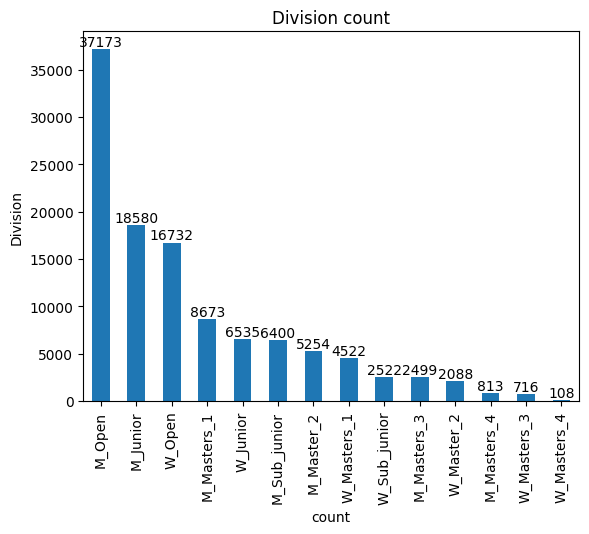

In [ ]:
Div_count=O_data.Division.value_counts().plot.bar(title=('Division count'),xlabel=('count'),ylabel=('Division'))
Div_count.bar_label(Div_count.containers[0])

In [ ]:
O_data.groupby('Division')['Equipment'].value_counts().reset_index()

Division      Equipment 
M_Junior      Raw           13287
              Wraps          3385
              Single-ply     1653
              Multi-ply       255
M_Master_2    Raw            3010
              Single-ply     1221
              Wraps           717
              Multi-ply       306
M_Masters_1   Raw            5090
              Single-ply     1682
              Wraps          1419
              Multi-ply       481
              Straps            1
M_Masters_3   Raw            1442
              Single-ply      632
              Wraps           296
              Multi-ply       129
M_Masters_4   Raw             491
              Single-ply      223
              Wraps            71
              Multi-ply        28
M_Open        Raw           23908
              Wraps          8099
              Single-ply     4014
              Multi-ply      1147
              Straps            5
M_Sub_junior  Raw            4193
              Single-ply     1310
              Wraps    

[Text(0, 0, '23871'),
 Text(0, 0, '4924'),
 Text(0, 0, '4052'),
 Text(0, 0, '376'),
 Text(0, 0, '51421'),
 Text(0, 0, '14834'),
 Text(0, 0, '10735'),
 Text(0, 0, '2396'),
 Text(0, 0, '6')]

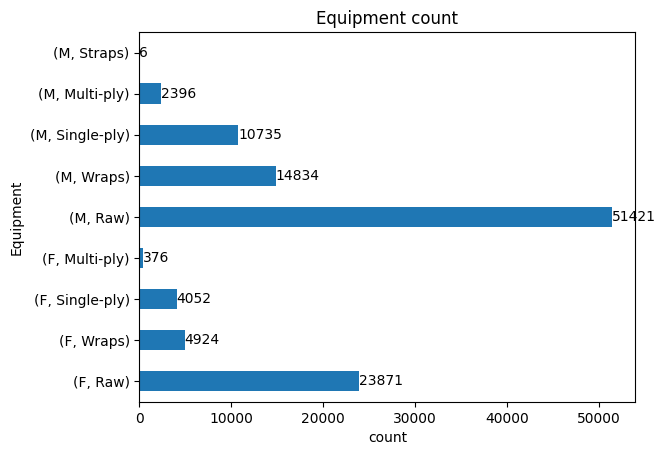

In [ ]:
Equipment_count=(O_data).groupby('Sex')['Equipment'].value_counts().plot.barh(title=('Equipment count'),xlabel=('count'),ylabel=('Equipment'),stacked=True)
Equipment_count.bar_label(Equipment_count.containers[0])

##**Question-Answer**

**1.Total qualified men and women**

<Axes: ylabel='Gender'>

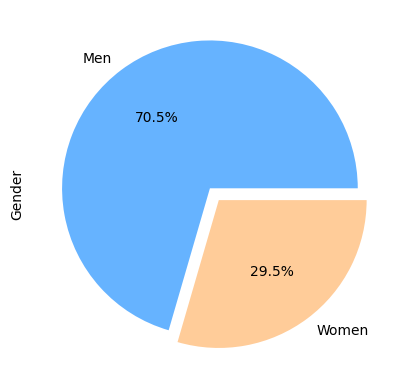

In [ ]:
O_data.Sex.value_counts().plot(kind="pie",ylabel='Gender',labels = ['Men', 'Women'],autopct='%1.1f%%',explode=[0.05, 0.05],colors=['#66b3ff','#ffcc99'])


**2.Maximum squat,Bench,Deadlift**

In [ ]:
Max=O_data.groupby('Sex')['BestSquatKg','BestBenchKg','BestDeadliftKg'].max().reset_index()
Max

<ipython-input-336-61fbb240cfe3>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  Max=O_data.groupby('Sex')['BestSquatKg','BestBenchKg','BestDeadliftKg'].max()


,BestSquatKg,BestBenchKg,BestDeadliftKg
Sex,,,
F,332.50,235.87,277.5
M,548.85,488.50,450.0


<Axes: title={'center': 'Maximum Lift'}, xlabel='Sex', ylabel='Weight'>

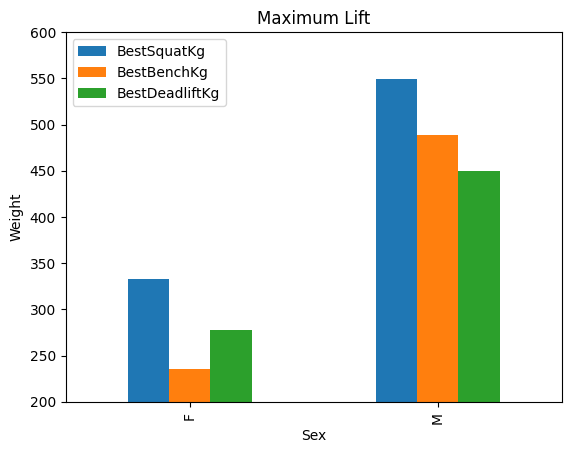

In [ ]:
Max.plot.bar(title="Maximum Lift", use_index = True, xlabel=("Sex"),
ylabel= ("Weight"),ylim=(200,600))

**3.Maximum Wilks**

<Axes: title={'center': 'Maximum Wilks'}, xlabel='Sex', ylabel='Wilks'>

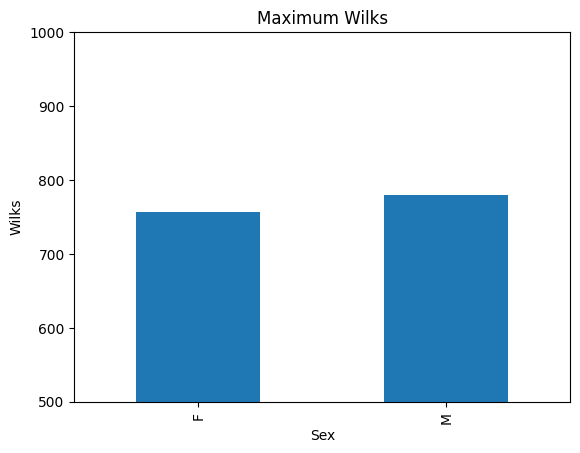

In [ ]:
(O_data.groupby('Sex')['Wilks'].max().reset_index()).plot.bar(title="Maximum Wilks", use_index = True, xlabel=("Sex"),
ylabel= ("Wilks"),ylim=(500,1000))

**4.Maximum total weight lifted**

In [ ]:
O_data.groupby('Sex')['TotalKg'].max()

Sex
F     796.05
M    1363.05
Name: TotalKg, dtype: float64

**5.Women winner in different divisions**

In [ ]:
W_Sub_junior.groupby('Name','Equipment')['Wilks'].max()

**6.Competitors disqualified**

In [ ]:
O_data[(O_data.Place=='DQ')]

**7.Competitor gender ratio**

In [ ]:
O_data[O_data.Sex=='M'].shape[0]/O_data[O_data.Sex=='F'].shape[0]

2.3896698070613733

**8.Compare core count between men and women**

In [ ]:
O_data.groupby('Sex')['BestSquatKg','BestBenchKg','BestDeadliftKg'].count()

**9.What are different official IPF divisions**

In [ ]:
O_data.Division.unique()

NameError: name 'O_data' is not defined